# j-stage の検索画面からファセットを抜き出す

id="srySybt1" value="100"ジャーナル
id="srySybt2" value="200"会議録・要旨集
id="srySybt3" value="400"研究報告書・技術報告書
id="srySybt4" value="500"解説誌・一般情報誌
id="srySybt5" value="600"その他

In [ ]:
from symbol import term
from bs4 import BeautifulSoup
from urllib import request
import re
import time

term_list = range(2000, 2023, 1)

def main():
   facet_cum = []
   for term in term_list:
       time.sleep(5)
       es_list = scrape(term)
       facet_cum.extend(split_filter(es_list, term))
   return facet_cum

def scrape(term):
   url = 'https://www.jstage.jst.go.jp/result/global/-char/ja?&cond1=&type=100&bglobalSearch=false&showRecords=10&yearfrom=' + str(term) + '&yearto=' + str(term)
   response = request.urlopen(url)
   soup = BeautifulSoup(response)
   # htm_tag:for="nhuSnsybt1"
   es = soup.find_all('label')
   response.close()
   return es

def split_filter(es_list, term):
   facet = []
   for item in es_list:
       filter0 = item.text
       filter0 = re.sub('[\n\(\) ]', '', filter0)
       # パターンにマッチした部分で分割 re.split()
       item_name = re.split(r'\t+', filter0)
       item_name.insert(0, term)
       facet.append(item_name)
   return facet

if __name__ == "__main__":
    type_list = main()

In [ ]:
print(type_list)

In [237]:
# DataFrame に変換
import pandas as pd
df = pd.DataFrame(type_list)
df.dropna(axis=1, how='all')
df

,0,1,2,3
0,2000,ジャーナル,"74,119",
1,2000,会議録・要旨集,,None
2,2000,研究報告書・技術報告書,,None
3,2000,解説誌・一般情報誌,,None
4,2000,その他,,None
...,...,...,...,...
1007,2022,並べ替え,None,None
1008,2022,表示,None,None
1009,2022,件,None,None
1010,2022,表示,None,None


In [238]:
# 空白、None を Nanに変換
import numpy as np
df[2] = df[2].fillna(np.nan)
df[2] = df[2].replace(r'', np.nan, regex=True)
df[2] = df[2].str.replace(',', '').astype('float64')
df

,0,1,2,3
0,2000,ジャーナル,74119.0,
1,2000,会議録・要旨集,NaN,None
2,2000,研究報告書・技術報告書,NaN,None
3,2000,解説誌・一般情報誌,NaN,None
4,2000,その他,NaN,None
...,...,...,...,...
1007,2022,並べ替え,NaN,None
1008,2022,表示,NaN,None
1009,2022,件,NaN,None
1010,2022,表示,NaN,None


In [239]:
# 横持に変換
dfpivot = df.pivot_table(values=[2], index=[0], columns=[1], aggfunc='sum')
print(dfpivot)

            2                                                                 \
1       2000年    2001年    2002年    2003年    2004年    2005年    2006年    2007年   
0                                                                              
2000  74119.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2001      NaN  75222.0      NaN      NaN      NaN      NaN      NaN      NaN   
2002      NaN      NaN  76657.0      NaN      NaN      NaN      NaN      NaN   
2003      NaN      NaN      NaN  77409.0      NaN      NaN      NaN      NaN   
2004      NaN      NaN      NaN      NaN  78762.0      NaN      NaN      NaN   
2005      NaN      NaN      NaN      NaN      NaN  81023.0      NaN      NaN   
2006      NaN      NaN      NaN      NaN      NaN      NaN  80968.0      NaN   
2007      NaN      NaN      NaN      NaN      NaN      NaN      NaN  80226.0   
2008      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2009      NaN      NaN      NaN      NaN

In [240]:
# multiindexの解除
dfpivot = dfpivot.reset_index()
dfpivot = dfpivot.droplevel(0, axis=1)
dfpivot
# dfpivot2 = dfpivot.droplevel('0', axis=1)
# dfpvot.index
# dfpvot.reset_index(level='0', drop=True, inplace=True)

1,,2000年,2001年,2002年,2003年,2004年,2005年,2006年,2007年,2008年,...,西島栄治,西野義則,西間三馨,解説誌・一般情報誌,認証あり,谷口正実,辰巳泰我,農学・食品科学,鈴木衞,電子付録
0,2000,74119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3226.0,NaN,NaN,15626.0,NaN,3.0
1,2001,NaN,75222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3334.0,NaN,NaN,NaN,NaN,3.0
2,2002,NaN,NaN,76657.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3368.0,NaN,NaN,NaN,NaN,14.0
3,2003,NaN,NaN,NaN,77409.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3266.0,NaN,NaN,NaN,NaN,18.0
4,2004,NaN,NaN,NaN,NaN,78762.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3613.0,NaN,NaN,NaN,NaN,27.0
5,2005,NaN,NaN,NaN,NaN,NaN,81023.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3471.0,NaN,NaN,NaN,NaN,309.0
6,2006,NaN,NaN,NaN,NaN,NaN,NaN,80968.0,NaN,NaN,...,NaN,NaN,NaN,0.0,3582.0,NaN,NaN,NaN,NaN,366.0
7,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80226.0,NaN,...,NaN,NaN,NaN,0.0,3912.0,NaN,NaN,NaN,NaN,493.0
8,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81324.0,...,NaN,NaN,44.0,0.0,5307.0,NaN,NaN,NaN,NaN,484.0
9,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,5740.0,35.0,NaN,NaN,NaN,591.0


In [241]:
print(dfpivot.columns.values.tolist())        # columnsをリストで表示する

['', '2000年', '2001年', '2002年', '2003年', '2004年', '2005年', '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年', '2014年', '2015年', '2016年', '2017年', '2018年', '2019年', '2020年', '2021年', '2022年', 'ChemistryLetters', 'CirculationJournal', 'ISIJInternational', 'InternalMedicine', 'J-STAGEData', 'JapaneseGeotechnicalSocietySpecialPublication', 'JournalofArrhythmia', 'JournalofPhysicalTherapyScience', '[記載なし]', '『応用物理』編集委員会', 'その他', 'アレルギー', 'オープンアクセス', 'シンセシオロジー編集委員会', 'ジャーナル', 'ナノ・材料科学', 'ファルマシア', 'フリー', '一般医学・社会医学・看護学', '一般工学・総合工学', '三木恒治', '並べ替え', '中井吉英', '中部日本整形外科災害外科学会雑誌', '久保千春', '久志本成樹', '件', '会誌編集委員会', '会議録・要旨集', '加藤治文', '加藤紘之', '原田保', '古江増隆', '吉田茂男', '国立研究開発法人科学技術振興機構', '国際生命情報科学会', '土井俊央', '外部データリポジトリの登録がある記事を絞り込むことができます。', '学際科学', '宇佐美真一', '宇多高明', '小倉裕司', '小川郁', '小林剛', '山口泰博', '山崎洋次', '山田浩之', '峯田周幸', '影山幸雄', '心身医学', '新着', '日本呼吸器外科学会雑誌', '日本小児外科学会雑誌', '日本放射線技術学会雑誌', '日本泌尿器科学会雑誌', '日本看護研究学会雑誌', '日本耳鼻咽喉科頭頸部外科学会会報', '日本臨床外科学会雑誌', '早期公開', '木原和徳', '本文（HTML形式）', '本村浩之'

In [243]:
dfpivot.set_index(list(dfpivot.columns[[0]]),drop=True , inplace=True)
dfpivot

1,2001年,2002年,2003年,2004年,2005年,2006年,2007年,2008年,2009年,2010年,...,西島栄治,西野義則,西間三馨,解説誌・一般情報誌,認証あり,谷口正実,辰巳泰我,農学・食品科学,鈴木衞,電子付録
,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3226.0,NaN,NaN,15626.0,NaN,3.0
2001,75222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3334.0,NaN,NaN,NaN,NaN,3.0
2002,NaN,76657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3368.0,NaN,NaN,NaN,NaN,14.0
2003,NaN,NaN,77409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3266.0,NaN,NaN,NaN,NaN,18.0
2004,NaN,NaN,NaN,78762.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3613.0,NaN,NaN,NaN,NaN,27.0
2005,NaN,NaN,NaN,NaN,81023.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3471.0,NaN,NaN,NaN,NaN,309.0
2006,NaN,NaN,NaN,NaN,NaN,80968.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3582.0,NaN,NaN,NaN,NaN,366.0
2007,NaN,NaN,NaN,NaN,NaN,NaN,80226.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3912.0,NaN,NaN,NaN,NaN,493.0
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81324.0,NaN,NaN,...,NaN,NaN,44.0,0.0,5307.0,NaN,NaN,NaN,NaN,484.0


In [244]:
dfpivot2 = dfpivot[['ジャーナル', 'オープンアクセス',  'フリー',  '認証あり', '査読あり']]
dfpivot2

1,ジャーナル,オープンアクセス,フリー,認証あり,査読あり
,,,,,
2000,74119.0,2524.0,70893.0,3226.0,33453.0
2001,75222.0,3059.0,71888.0,3334.0,37193.0
2002,76657.0,2977.0,73289.0,3368.0,39601.0
2003,77409.0,3091.0,74143.0,3266.0,42001.0
2004,78762.0,3413.0,75149.0,3613.0,46572.0
2005,81023.0,3756.0,77552.0,3471.0,52497.0
2006,80968.0,4010.0,77386.0,3582.0,54966.0
2007,80226.0,4460.0,76314.0,3912.0,57790.0
2008,81324.0,4602.0,76017.0,5307.0,62544.0


In [234]:
dfpivot3 = dfpivot2.copy()
dfpivot3['ninsho_total'] = dfpivot3.loc[:,['オープンアクセス',  'フリー',  '認証あり']].sum(axis=1)
dfpivot3

1,ジャーナル,オープンアクセス,フリー,認証あり,査読あり,ninsho_total
2002年,,,,,,
NaN,74119.0,2524.0,70893.0,3226.0,33453.0,76643.0
NaN,75222.0,3059.0,71888.0,3334.0,37193.0,78281.0
76657.0,76657.0,2977.0,73289.0,3368.0,39601.0,79634.0
NaN,77409.0,3091.0,74143.0,3266.0,42001.0,80500.0
NaN,78762.0,3413.0,75149.0,3613.0,46572.0,82175.0
NaN,81023.0,3756.0,77552.0,3471.0,52497.0,84779.0
NaN,80968.0,4010.0,77386.0,3582.0,54966.0,84978.0
NaN,80226.0,4460.0,76314.0,3912.0,57790.0,84686.0
NaN,81324.0,4602.0,76017.0,5307.0,62544.0,85926.0


In [210]:
def ninsho_sonota(dfpivot3):
    result = dfpivot3['ジャーナル'] - ( dfpivot3['オープンアクセス'] + dfpivot3['フリー'] )
    return result

dfpivot3['ninsho_sonota'] = dfpivot3.apply(ninsho_sonota,axis=1)
dfpivot3

,1,ジャーナル,オープンアクセス,フリー,認証あり,査読あり,ninsho_total,ninsho_sonota
,,,,,,,,
2000,2000,74119.0,2524.0,70893.0,3226.0,33453.0,76643.0,702.0
2001,2001,75222.0,3059.0,71888.0,3334.0,37193.0,78281.0,275.0
2002,2002,76657.0,2977.0,73289.0,3368.0,39601.0,79634.0,391.0
2003,2003,77409.0,3091.0,74143.0,3266.0,42001.0,80500.0,175.0
2004,2004,78762.0,3413.0,75149.0,3613.0,46572.0,82175.0,200.0
2005,2005,81023.0,3756.0,77552.0,3471.0,52497.0,84779.0,-285.0
2006,2006,80968.0,4010.0,77386.0,3582.0,54966.0,84978.0,-428.0
2007,2007,80226.0,4460.0,76314.0,3912.0,57790.0,84686.0,-548.0
2008,2008,81324.0,4602.0,76017.0,5307.0,62544.0,85926.0,705.0


In [245]:
# dfpivot2.columns[[0]] # Index(['ジャーナル'], dtype='object', name=1)
dfpivot2.reset_index()
# dfpivot2.drop(dfpivot2.columns[[0,1]], axis=1)
dfpivot2

1,ジャーナル,オープンアクセス,フリー,認証あり,査読あり
,,,,,
2000,74119.0,2524.0,70893.0,3226.0,33453.0
2001,75222.0,3059.0,71888.0,3334.0,37193.0
2002,76657.0,2977.0,73289.0,3368.0,39601.0
2003,77409.0,3091.0,74143.0,3266.0,42001.0
2004,78762.0,3413.0,75149.0,3613.0,46572.0
2005,81023.0,3756.0,77552.0,3471.0,52497.0
2006,80968.0,4010.0,77386.0,3582.0,54966.0
2007,80226.0,4460.0,76314.0,3912.0,57790.0
2008,81324.0,4602.0,76017.0,5307.0,62544.0


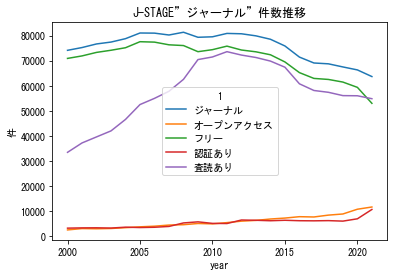

In [260]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
pd.options.plotting.backend = 'matplotlib'
# 折れ線グラフをプロット
dfpivot2.iloc[:22, :].plot()
prefix = 'dfplot-plt'
plt.rcParams["font.family"] = "MS Gothic"
plt.title('J-STAGE”ジャーナル”件数推移')
plt.xlabel('year')
plt.ylabel('件')
plt.savefig(f"{prefix}_simple")
plt.show()